**Import Libraries**

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics

%matplotlib inline

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.12.0


**Import Folder**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Compress data (sudah di run)

import os
import zipfile

local_zip = '/content/drive/MyDrive/My_Capstone/lettuce.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/My_Capstone/lettuce_data')
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
os.listdir('/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK')

['FN', '-P', '-K', '-N']

In [ ]:
#load image

# Main directory
base_dir = '/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK'

# Folder names containing the images
folder_names = ['FN', '-N', '-P', '-K']

# Loop through each folder
for folder in folder_names:
    folder_path = os.path.join(base_dir, folder)
    
    # Loop through each image file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            
            # Read the image using cv2
            image = cv2.imread(image_path)
            
            # Convert BGR image to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Display the image using matplotlib
            plt.imshow(image)
            plt.axis('off')  # Turn off axis labels
            plt.show()

In [ ]:
# Preprocessing 

import os
import cv2

def preprocessing_images_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            file_path = os.path.join(folder_path, filename)
            
            # Load the image
            image = cv2.imread(file_path)
            if image is not None:
                
                # Resize the image
                resized_image = cv2.resize(image, (224, 224))
                cv2.imwrite(file_path, resized_image)
                
                # Normalization
                normalized_image = image.astype(np.float32)/ 255.0
                
                # Color correction
                # adjusted_image = cv2.convertScaleAbs(image, alpha=1, beta=0)
                
folder_paths = ['/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK/FN', '/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK/-N', '/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK/-P', '/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK/-K']

for folder_path in folder_paths:
    preprocessing_images_in_folder(folder_path)

In [ ]:
!pip install Pillow
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
image = Image.open('/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK/FN/fn1.png')

# Get size
width, height = image.size

# Print size
print('Width:', width)
print('Height:', height)

Width: 224
Height: 224


**Split Data**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to the base directory containing the four folders
base_directory = '/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK'

# Set the paths for the train and test directories
train_directory = '/content/drive/MyDrive/My_Capstone/train'
test_directory = '/content/drive/MyDrive/My_Capstone/test'

# Create the train and test directories if they don't exist
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Iterate over the folders in the base directory
for folder_name in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder_name)
    
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Split the images into train and test sets
        images = os.listdir(folder_path)
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        
        # Copy train images to the train directory
        for image in train_images:
            src = os.path.join(folder_path, image)
            dst = os.path.join(train_directory, folder_name, image)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy2(src, dst)
        
        # Copy test images to the test directory
        for image in test_images:
            src = os.path.join(folder_path, image)
            dst = os.path.join(test_directory, folder_name, image)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy2(src, dst)

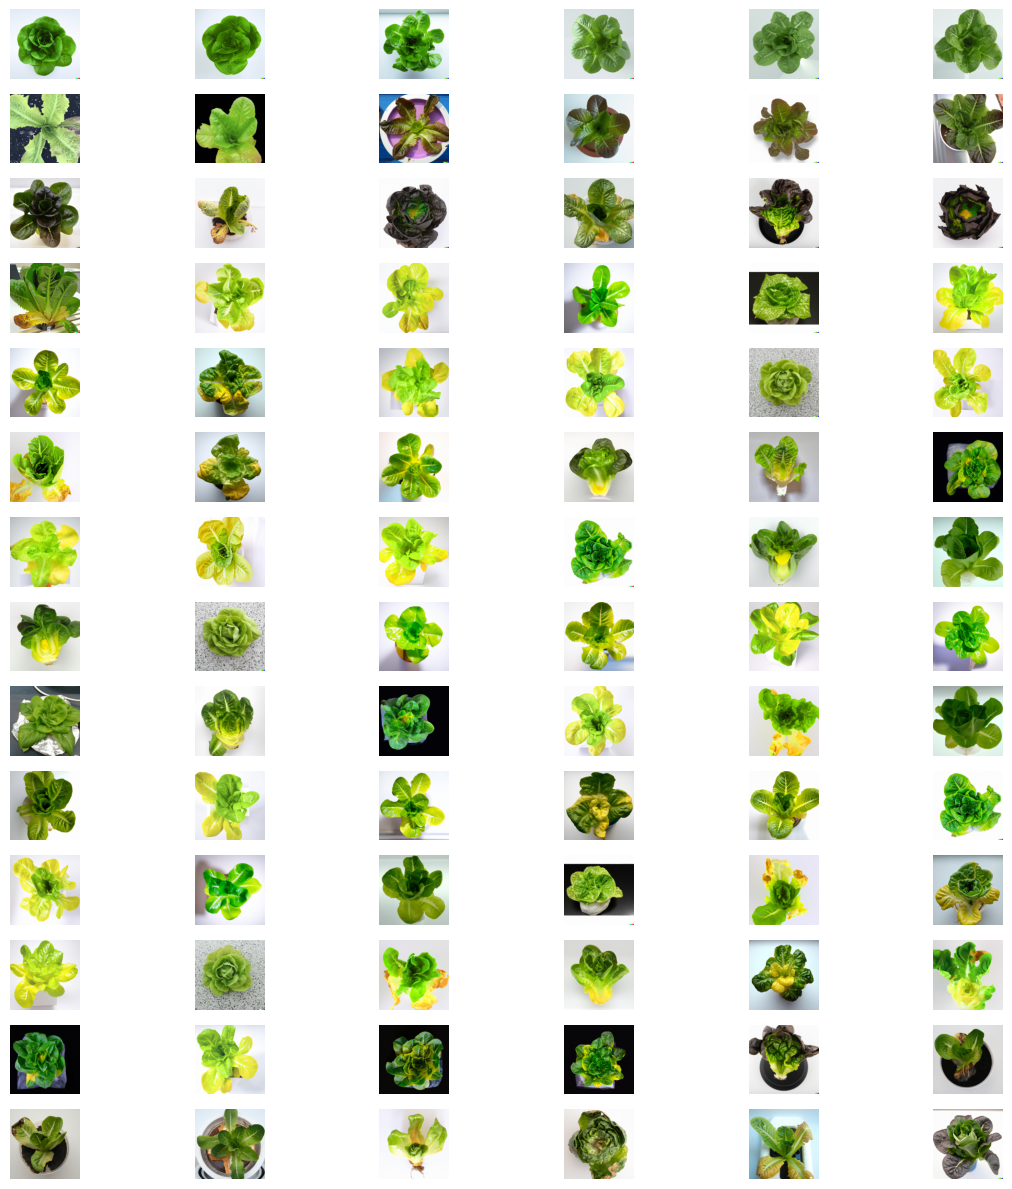

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/My_Capstone/lettuce_data/FNNPK'
num_rows = 14
num_cols = 6

# Create a figure and axis objects for plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the folders in the base directory
for i, folder_name in enumerate(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder_name)
    
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Iterate over files in the current folder
        for j, file_name in enumerate(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, file_name)
            
            # Check if the item is a file
            if os.path.isfile(file_path):
                # Load the image
                image = cv2.imread(file_path)
                
                # Convert BGR image to RGB for display
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # Display the image on the corresponding axis
                axes[i * num_cols + j].imshow(image_rgb)
                axes[i * num_cols + j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


In [ ]:
# Feature Extraction

import os
import cv2
import numpy as np
from sklearn.feature_extraction import image

# Set the paths to the train and test directories
train_directory = '/content/drive/MyDrive/My_Capstone/train'
test_directory = '/content/drive/MyDrive/My_Capstone/test'

# Set the number of variables/features
num_variables = 4

# Initialize lists to store the features and labels
train_features = []
train_labels = []
test_features = []
test_labels = []

# Function to extract features from an image
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Perform feature extraction (e.g., using color histograms, HOG, etc.)
    # Replace this with your own feature extraction code
    # Here, we use a simple example of resizing the image and flattening it
    resized_image = cv2.resize(image, (32, 32))
    flattened_image = resized_image.flatten()
    
    return flattened_image

# Iterate over the train directory and extract features for each image
for folder_name in os.listdir(train_directory):
    folder_path = os.path.join(train_directory, folder_name)
    
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Iterate over the files in the current folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            # Check if the item is a file
            if os.path.isfile(file_path):
                # Extract features from the image
                features = extract_features(file_path)
                
                # Append the features and corresponding label to the train lists
                train_features.append(features)
                train_labels.append(folder_name)

# Iterate over the test directory and extract features for each image
for folder_name in os.listdir(test_directory):
    folder_path = os.path.join(test_directory, folder_name)
    
    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Iterate over the files in the current folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            # Check if the item is a file
            if os.path.isfile(file_path):
                # Extract features from the image
                features = extract_features(file_path)
                
                # Append the features and corresponding label to the test lists
                test_features.append(features)
                test_labels.append(folder_name)

# Convert the lists to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

# Print the shape of the feature arrays
print('Train Features Shape:', train_features.shape)
print('Test Features Shape:', test_features.shape)

Train Features Shape: (179, 3072)
Test Features Shape: (59, 3072)


In [ ]:
# Train the model

import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")


ValueError: ignored

In [ ]:
# Evaluate the model



**Color identification**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([187.73302518, 208.26410583, 158.61555626]),
 array([ 8.42180428, 64.04596535,  6.38411113]),
 array([166.25940924, 213.05210815,  25.73100286]),
 array([105.61668536, 190.6482197 ,  10.32859695]),
 array([251.7287259 , 252.07988827, 252.10524419]),
 array([ 17.78407679, 124.46385568,   8.69139135]),
 array([110.05538521, 192.82771207,  68.25609578]),
 array([ 58.29392147, 161.96510104,  23.64052884])]

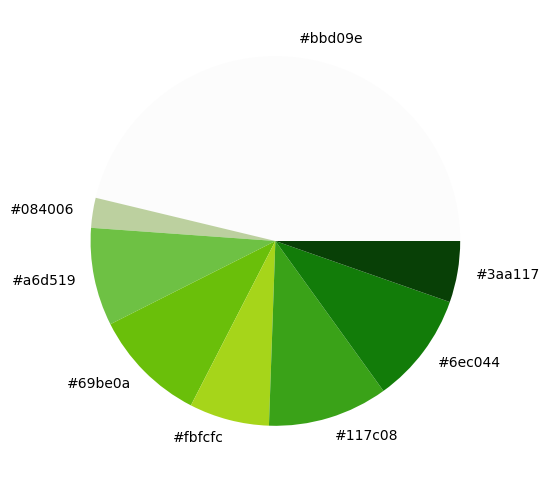

In [ ]:
get_colors(get_image('/content/drive/MyDrive/My_Capstone/lettuce_data/train/-N/n_17.png'), 8, True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([147.47974989, 149.47179196,  72.46208138]),
 array([217.96271091, 215.72009659, 213.17675469]),
 array([111.54279801, 120.17268212,  37.81663907]),
 array([189.95568523, 182.9973301 , 174.88285486]),
 array([70.56458492, 86.3397182 , 14.92817974]),
 array([32.32928127, 48.09711205,  5.11191237]),
 array([244.8516232 , 244.97013232, 245.02215555]),
 array([182.47635223, 180.40047034, 113.13457016])]

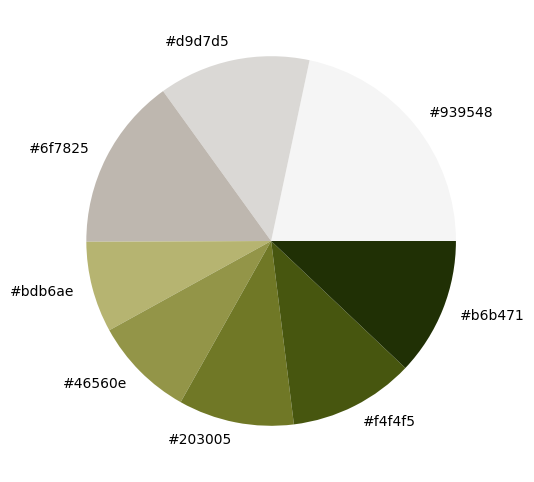

In [ ]:
get_colors(get_image('/content/drive/MyDrive/My_Capstone/lettuce_data/train/-K/k_11.png'), 8, True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([232.04380775, 232.37861272, 220.70684084]),
 array([ 21.83836717, 100.17382883, 186.8771074 ]),
 array([48.66629148, 65.23057803, 15.18027905]),
 array([173.39529879, 194.64625062, 163.01787783]),
 array([ 89.07089067, 108.6980713 ,  33.3880973 ]),
 array([133.13376347, 142.2908121 ,  74.44313881]),
 array([65.14617636, 46.49015884, 38.12117692]),
 array([103.76662641,  81.22625245,  68.38958064])]

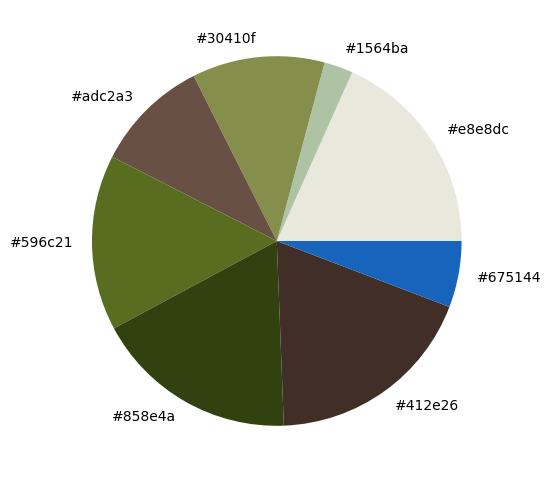

In [ ]:
get_colors(get_image('/content/drive/MyDrive/My_Capstone/lettuce_data/train/-P/p15.png'), 8, True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([ 76.50990683, 119.3856292 ,  29.42325156]),
 array([184.95638237, 220.28929594, 174.08048082]),
 array([212.20675507, 221.62900212, 221.14321562]),
 array([ 96.69664384, 140.32681551,  49.53905873]),
 array([117.40360074, 154.92643836,  89.56653633]),
 array([224.37454722, 230.13276907, 233.34904781]),
 array([47.72703138, 80.29734513, 12.90627514]),
 array([150.00866639, 186.51855628, 123.06596656])]

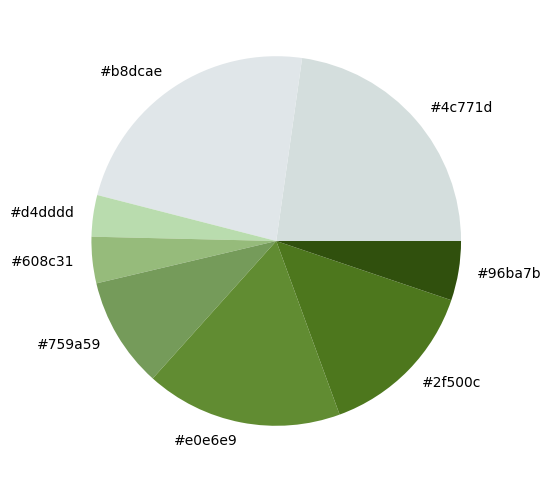

In [ ]:
get_colors(get_image('/content/drive/MyDrive/My_Capstone/lettuce_data/train/FN/fn12.png'), 8, True)

**TF**

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
train_directory = '/content/drive/MyDrive/My_Capstone/train'
test_directory = '/content/drive/MyDrive/My_Capstone/test'

train_fn_dir = os.path.join(train_directory, 'FN')
train_n_dir = os.path.join(train_directory, '-N')
train_p_dir = os.path.join(train_directory, '-P')
train_k_dir = os.path.join(train_directory, '-K')

test_fn_dir = os.path.join(test_directory, 'FN')
test_n_dir = os.path.join(test_directory, '-N')
test_p_dir = os.path.join(test_directory, '-P')
test_k_dir = os.path.join(test_directory, '-K')

print(f"There are {len(os.listdir(train_fn_dir))} images of FN for training.\n")
print(f"There are {len(os.listdir(train_n_dir))} images of -N for training.\n")
print(f"There are {len(os.listdir(train_p_dir))} images of -P for training.\n")
print(f"There are {len(os.listdir(train_k_dir))} images of -K for training.\n")

print(f"There are {len(os.listdir(test_fn_dir))} images of FN for testing.\n")
print(f"There are {len(os.listdir(test_n_dir))} images of -N for testing.\n")
print(f"There are {len(os.listdir(test_p_dir))} images of -P for testing.\n")
print(f"There are {len(os.listdir(test_k_dir))} images of -K for testing.\n")

There are 11 images of FN for training.

There are 51 images of -N for training.

There are 57 images of -P for training.

There are 60 images of -K for training.

There are 5 images of FN for testing.

There are 17 images of -N for testing.

There are 19 images of -P for testing.

There are 18 images of -K for testing.



Sample FN image:


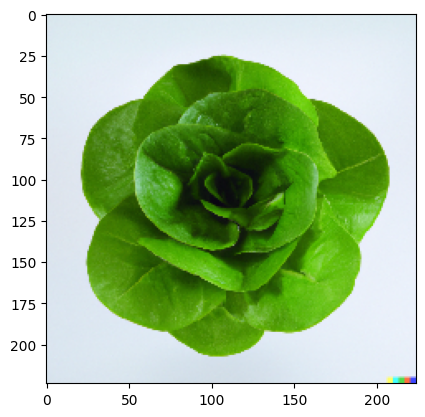


Sample -N image:


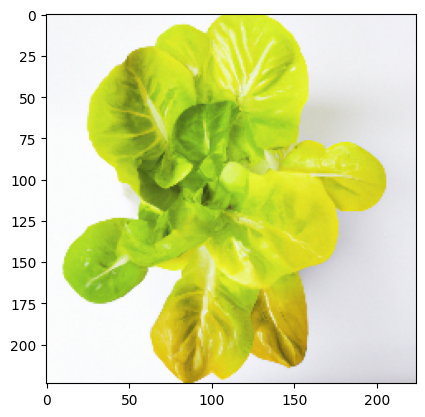


Sample -P image:


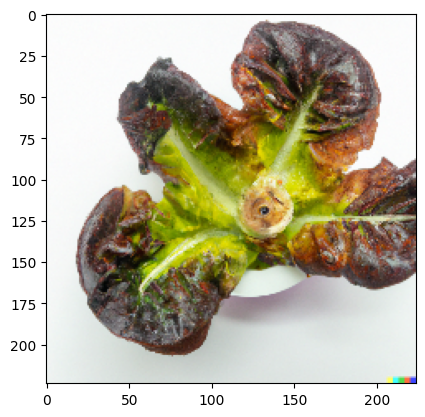


Sample -K image:


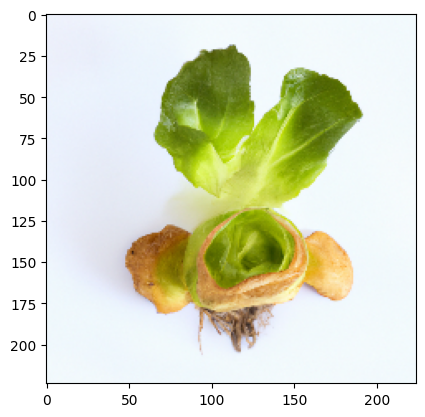

In [ ]:
print("Sample FN image:")
plt.imshow(load_img(f"{os.path.join(train_fn_dir, os.listdir(train_fn_dir)[0])}"))
plt.show()

print("\nSample -N image:")
plt.imshow(load_img(f"{os.path.join(train_n_dir, os.listdir(train_n_dir)[0])}"))
plt.show()

print("\nSample -P image:")
plt.imshow(load_img(f"{os.path.join(train_p_dir, os.listdir(train_p_dir)[0])}"))
plt.show()

print("\nSample -K image:")
plt.imshow(load_img(f"{os.path.join(train_k_dir, os.listdir(train_k_dir)[0])}"))
plt.show()

In [ ]:
# Load the first example of FN
sample_img  = load_img(f"{os.path.join(train_fn_dir, os.listdir(train_fn_dir)[0])}")

# Convert the image into numpy array
sample_array = img_to_array(sample_img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (224, 224, 3)


**Training and Validation**

In [ ]:
def train_val_gen(TRAIN_DIR, TEST_DIR):
  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2, 
                                     horizontal_flip = True)
  train_gen = train_datagen.flow_from_directory(directory = TRAIN_DIR,
                                                batch_size = 32, 
                                                class_mode = 'binary',
                                                target_size = (150, 150))
  test_datagen = ImageDataGenerator(rescale = 1./255.)

  test_gen = test_datagen.flow_from_directory(directory = TEST_DIR,
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              target_size = (150, 150))
  return train_gen, test_gen
  

In [ ]:
train_gen, test_gen = train_val_gen(train_directory, test_directory)

Found 179 images belonging to 4 classes.
Found 59 images belonging to 4 classes.


In [ ]:
# Create pre trained model
def create_pre_trained_model(local_weights_file):
  pre_trained_model = In